<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neural-Network-Classifier" data-toc-modified-id="Neural-Network-Classifier-1">Neural Network Classifier</a></span></li><li><span><a href="#Apply-NeuralNetworkClassifier-to-Handwritten-Digits" data-toc-modified-id="Apply-NeuralNetworkClassifier-to-Handwritten-Digits-2">Apply <code>NeuralNetworkClassifier</code> to Handwritten Digits</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-3">Experiments</a></span><ul class="toc-item"><li><span><a href="#Check-In" data-toc-modified-id="Check-In-3.1">Check-In</a></span></li></ul></li><li><span><a href="#Grading" data-toc-modified-id="Grading-4">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-5">Extra Credit</a></span></li></ul></div>

# Neural Network Classifier

For this assignment, you will be adding code to the python script file `neuralnetworksA4.py` that you can download from [here](https://www.cs.colostate.edu/~anderson/cs545/notebooks/neuralnetworksA4.tar). This file currently contains the implementation of the `NeuralNetwork` class that is a solution to A3. It also contains an incomplete implementation of the subclass `NeuralNetworkClassifier` that extends `NeuralNetwork` as discussed in class.  You must complete this implementation. Your `NeuralNetworkClassifier` implementation should rely on inheriting functions from `NeuralNetwork` as much as possible. Your `neuralnetworksA4.py` file (notice it is plural) will now contain two classes, `NeuralNetwork` and `NeuralNetworkClassifier`.

In `NeuralNetworkClassifier` you will replace the `_error_f` function with one called `_neg_log_likelihood_f`. You will also have to define a new version of the `_gradient_f` function for `NeuralNetworkClassifier`.

Here are some example tests.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# import neuralnetworksA4 as nn
import A4mysolution as nn

In [4]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([[0], [1], [1], [0]])
X, T

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [5]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [6]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2)


In [7]:
nnet.Ws

[array([[ 0.12952296, -0.38212533, -0.07383268,  0.31091752, -0.23633798,
         -0.40511172, -0.55139454, -0.09211682, -0.30174387, -0.18745848],
        [ 0.56662595, -0.3028474 , -0.48359706,  0.19583749,  0.13999926,
         -0.26066957, -0.03900416, -0.44067096, -0.49195143,  0.46277416],
        [ 0.33943873,  0.39325596,  0.36397022,  0.56690583,  0.08922813,
          0.36230683, -0.09085429, -0.5456561 , -0.05295844, -0.45573018]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])]

The `_error_f` function is replaced with `_neg_log_likelihood`.  If you add some print statements in `_neg_log_likelihood` functions, you can compare your output to the following results.

In [8]:
nnet.set_debug(True)

Debugging information will now be printed.


In [9]:
nnet.train(X, T, n_epochs=1, method='sgd', learning_rate=0.01)

In _neg_log_likelihood_f: arguments are
X (standardized):
[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]
T (indicator variables):
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Result of call to self._forward is:
[array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]]), array([[-0.65071726, -0.44024437,  0.04576217, -0.42339865, -0.43460927,
        -0.46740829, -0.39822372,  0.71346703,  0.23848393, -0.19208626],
       [ 0.34231299, -0.79254131, -0.72655903, -0.06007838, -0.18346578,
        -0.77314041, -0.46175878,  0.0128676 , -0.62959015,  0.62370478],
       [-0.09735492,  0.30405172,  0.64909581,  0.5928089 , -0.27947188,
         0.2144819 , -0.53935438, -0.19458859,  0.13639376, -0.80263068],
       [ 0.77613968, -0.28371417, -0.19108161,  0.79083647, -0.00711046,
        -0.294489  , -0.59233336, -0.79262132, -0.68931726, -0.1784822 ]]), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])]
Result of _softmax is:
[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.

NeuralNetworkClassifier(2, [10], 2)

In [10]:
nnet.set_debug(False)

No debugging information will be printed.


In [11]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2)
 Trained for 1 epochs.
 Final data likelihood 0.7071.


Now if you comment out those print statements, you can run for more epochs without tons of output.

In [12]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [13]:
nnet.train(X, T, 100, method='scg')

SCG: Iteration 10 Likelihood=0.99776
SCG: Iteration 20 Likelihood=0.99998
SCG: Iteration 30 Likelihood=1.00000


NeuralNetworkClassifier(2, [10], 2)

The `use()` function returns two `numpy` arrays. The first one are the class predictions for eachs sample, containing values from the set of unique values in `T` passed into the `train()` function.

The second value are the probabilities of each class for each sample. This should a column for each unique value in `T`.

In [14]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]]),
 array([[9.99999993e-01, 6.83429402e-09],
        [1.18921696e-08, 9.99999988e-01],
        [7.27450725e-09, 9.99999993e-01],
        [9.99999978e-01, 2.22265642e-08]]))

In [15]:
def percent_correct(Y, T):
    return np.mean(T == Y) * 100

In [16]:
percent_correct(nnet.use(X)[0], T)

100.0

Works!  The XOR problem was used early in the history of neural networks as a problem that cannot be solved with a linear model.  Let's try it.  It turns out our neural network code can do this if we use an empty list for the hidden unit structure!

In [17]:
nnet = nn.NeuralNetworkClassifier(2, [], 2)
nnet.train(X, T, 100, method='scg')

NeuralNetworkClassifier(2, [], 2)

In [18]:
nnet.use(X)

(array([[0],
        [0],
        [0],
        [0]]),
 array([[0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]))

In [19]:
percent_correct(nnet.use(X)[0], T)

50.0

A second way to evaluate a classifier is to calculate a confusion matrix. This shows the percent accuracy for each class, and also shows which classes are predicted in error.

Here is a function you can use to show a confusion matrix.

In [20]:
import pandas

def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    # cf.style.background_gradient(cmap='Blues').format("{:.1f} %")
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

In [21]:
confusion_matrix(nnet.use(X)[0], T)

Percent Correct


,0,1
0,100.0,0.0
1,100.0,0.0


# Apply `NeuralNetworkClassifier` to Handwritten Digits

Apply your `NeuralNetworkClassifier` to the [MNIST digits dataset](https://www.cs.colostate.edu/~anderson/cs545/notebooks/mnist.pkl.gz).

In [22]:
import pickle
import gzip

In [23]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [24]:
28*28

784

In [25]:
def draw_image(image, label, predicted_label=None):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    title = str(label)
    color = 'black'
    if predicted_label is not None:
        title += ' as {}'.format(predicted_label)
        if predicted_label != label:
            color = 'red'
    plt.title(title, color=color)

<IPython.core.display.Javascript object>


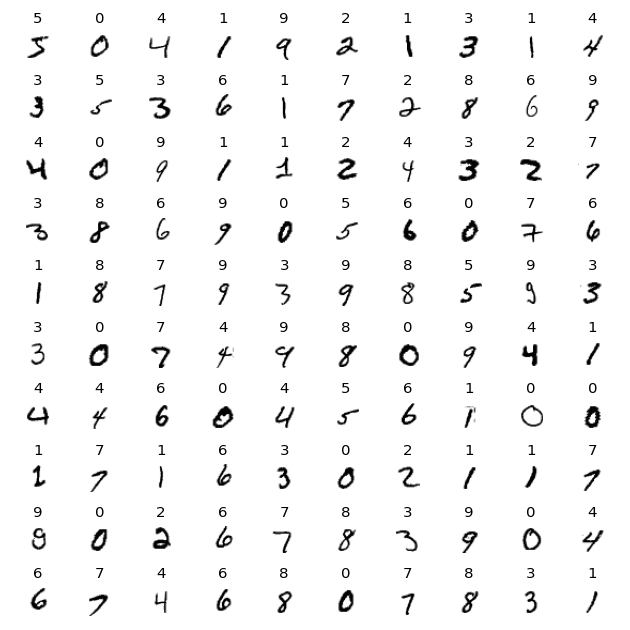

In [26]:
plt.figure(figsize=(7, 7))
for i in range(100):
    plt.subplot(10, 10, i+1)
    draw_image(Xtrain[i], Ttrain[i, 0])
plt.tight_layout()

In [27]:
nnet = nn.NeuralNetworkClassifier(784, [], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Iteration 4 Likelihood=0.95899
SCG: Iteration 8 Likelihood=0.97016
SCG: Iteration 12 Likelihood=0.97302
SCG: Iteration 16 Likelihood=0.97371
SCG: Iteration 20 Likelihood=0.97371
SCG: Iteration 24 Likelihood=0.97371
SCG: Iteration 28 Likelihood=0.97371
SCG: Iteration 32 Likelihood=0.97420
SCG: Iteration 36 Likelihood=0.97551
SCG: Iteration 40 Likelihood=0.97607


NeuralNetworkClassifier(784, [], 10)

In [28]:
print(nnet)

NeuralNetworkClassifier(784, [], 10)
 Trained for 41 epochs.
 Final data likelihood 0.9761.


In [29]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

[93.24, 92.72, 92.25999999999999]

In [30]:
confusion_matrix(nnet.use(Xtest)[0], Ttest)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,97.7,0.0,0.0,0.1,0.2,0.5,0.9,0.3,0.3,0.0
1,0.0,97.8,0.3,0.2,0.1,0.1,0.3,0.2,1.1,0.0
2,0.7,1.0,89.7,1.3,0.9,0.4,1.3,1.3,3.3,0.3
3,0.6,0.1,2.1,90.0,0.1,2.8,0.4,1.2,2.1,0.7
4,0.2,0.3,0.8,0.1,93.6,0.0,0.7,0.4,0.7,3.2
5,1.0,0.4,0.2,3.4,0.9,87.1,1.9,1.0,3.4,0.7
6,1.1,0.5,0.7,0.0,0.7,1.7,94.8,0.2,0.2,0.0
7,0.1,1.1,2.1,0.5,0.6,0.0,0.0,92.5,0.2,2.9
8,0.4,1.1,0.8,1.7,1.1,2.9,1.1,1.3,88.1,1.3
9,1.0,0.7,0.1,1.2,3.0,0.5,0.0,2.5,0.8,90.3


In [31]:
nnet = nn.NeuralNetworkClassifier(784, [20], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Iteration 4 Likelihood=0.85225
SCG: Iteration 8 Likelihood=0.88189
SCG: Iteration 12 Likelihood=0.94317
SCG: Iteration 16 Likelihood=0.96105
SCG: Iteration 20 Likelihood=0.96537
SCG: Iteration 24 Likelihood=0.96972
SCG: Iteration 28 Likelihood=0.97296
SCG: Iteration 32 Likelihood=0.97556
SCG: Iteration 36 Likelihood=0.97836
SCG: Iteration 40 Likelihood=0.98011


NeuralNetworkClassifier(784, [20], 10)

In [32]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[94.206, 93.60000000000001, 93.24]

In [33]:
confusion_matrix(nnet.use(Xtest)[0], Ttest)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,98.0,0.0,0.3,0.1,0.1,0.4,0.8,0.3,0.0,0.0
1,0.0,98.2,0.4,0.1,0.0,0.1,0.4,0.3,0.5,0.0
2,0.9,0.7,92.0,0.9,0.9,0.4,0.9,0.9,2.5,0.1
3,0.2,0.0,1.8,91.0,0.2,2.3,0.4,1.3,2.1,0.8
4,0.1,0.2,0.6,0.2,93.2,0.1,1.3,0.5,0.6,3.2
5,1.3,0.8,0.6,2.9,0.4,88.0,1.2,0.9,2.9,0.9
6,1.5,0.4,0.5,0.1,0.5,1.4,95.2,0.1,0.3,0.0
7,0.0,0.8,1.5,0.6,0.2,0.0,0.1,94.1,0.2,2.6
8,0.7,0.4,0.6,1.7,0.7,2.3,0.8,1.0,91.0,0.7
9,0.9,0.8,0.1,1.2,3.5,0.5,0.1,1.6,0.6,90.8


<IPython.core.display.Javascript object>


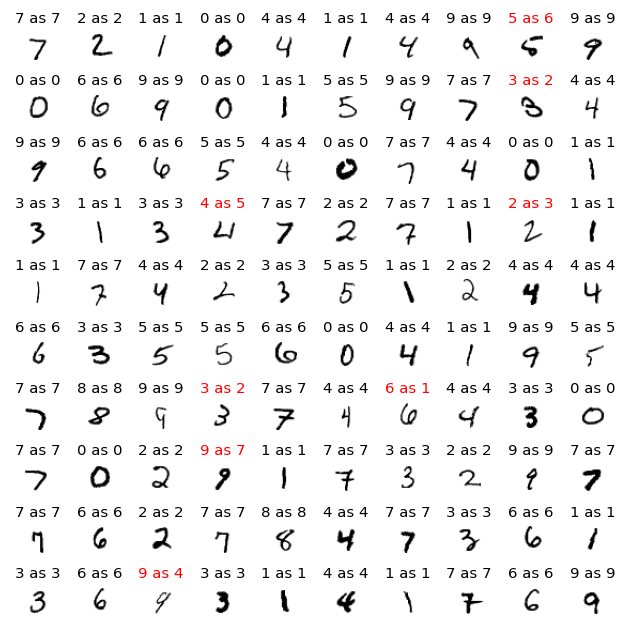

In [34]:
plt.figure(figsize=(7, 7))
Ytest, _ = nnet.use(Xtest[:100, :])
for i in range(100):
    plt.subplot(10, 10, i + 1)
    draw_image(Xtest[i], Ttest[i, 0], Ytest[i, 0])
plt.tight_layout()

# Experiments

For each method, try various hidden layer structures, learning rates, and numbers of epochs.  Use the validation percent accuracy to pick the best hidden layers, learning rates and numbers of epochs for each method (ignore learning rates for scg).  Report training, validation and test accuracy for your best validation results for each of the three methods.

Include plots of data likelihood versus epochs, and confusion matrices, for best results for each method.

Write at least 10 sentences about what you observe in the likelihood plots, the train, validation and test accuracies, and the confusion matrices.

## Check-In

Tar or zip your jupyter notebook (`<name>-A4.ipynb`) and your python script file (`neuralnetworksA4.py`) into a file named `<name>-A4.tar` or `<name>-A4.zip`.  Check in the tar or zip file in Canvas.

# Grading

Download [A4grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4grader.tar), extract `A4grader.py` before running the following cell.

Remember, you are expected to design and run your own tests in addition to the tests provided in `A4grader.py`.

In [37]:
%run -i A4grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Anderson-A4.ipynb' and storing in notebookcode.py


[NbConvertApp] Converting notebook Anderson-A4.ipynb to script


Removing all statements that are not function or class defs or import statements.

import neuralnetworksA4 as nn

## Testing inheritance ####################################################################

    correct = issubclass(NeuralNetworkClassifier, NeuralNetwork)


--- 10/10 points. NeuralNetworkClassifier correctly extends NeuralNetwork.

## Testing inheritance ####################################################################

    import inspect
    forward_func = [f for f in inspect.classify_class_attrs(NeuralNetworkClassifier) if (f.name == 'forward' or f.name == '_forward')]
    correct = forward_func[0].defining_class == NeuralNetwork


--- 5/5 points. NeuralNetworkClassifier forward function correctly inherited from NeuralNetwork.

## Testing inheritance ####################################################################

    import inspect
    str_func = [f for f in inspect.classify_class_attrs(NeuralNetworkClassifier) if (f.name == '__str__')]
    correct = str_func

# Extra Credit

Repeat the above experiments with a different data set.  Randonly partition your data into training, validaton and test parts if not already provided.  Write in markdown cells descriptions of the data and your results.